<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio EDA y Gestión de Nulos

AutoRenew, una empresa líder en la venta de coches de segunda mano, te ha contratado para desarrollar un modelo predictivo que estime el precio de los vehículos usados. Este modelo ayudará a la empresa a mejorar sus estrategias de ventas, marketing y optimización del inventario. Para ello, cuentas con un conjunto de datos que contiene información detallada sobre diversas características de los coches usados. Sin embargo, como es común en conjuntos de datos reales, encontrarás valores nulos y necesitarás realizar un análisis exploratorio para identificar patrones, correlaciones y posibles anomalías.

 En este laboratorio, tu tarea es realizar un análisis exploratorio de los datos (EDA) y gestionar los valores nulos que encuentres. Este es solo el primer paso de un proyecto que se desarrollará durante toda la semana, en el que usarás este mismo conjunto de datos para practicar diferentes fases del preprocesamiento.

**Columnas del conjunto de datos:**

- **dateCrawled**: Fecha y hora en que se recolectaron los datos del coche.

- **name**: Nombre del anuncio, generalmente incluye la marca y el modelo del coche.

- **seller**: Tipo de vendedor (particular o concesionario).

- **offerType**: Tipo de oferta (venta o subasta).

- **price**: Precio del coche en la moneda local.

- **abtest**: Campo utilizado para pruebas A/B, indicando diferentes versiones del sitio web o anuncio.

- **vehicleType**: Tipo de vehículo (sedán, SUV, hatchback, etc.).

- **yearOfRegistration**: Año de registro del coche.

- **gearbox**: Tipo de caja de cambios (manual o automática).

- **powerCV**: Potencia del coche en caballos de vapor (CV).

- **model**: Modelo específico del coche.

- **kilometer**: Kilometraje total del coche.

- **monthOfRegistration**: Mes de registro del coche.

- **fuelType**: Tipo de combustible (gasolina, diésel, eléctrico, etc.).

- **brand**: Marca del coche.

- **notRepairedDamage**: Indica si el coche tiene daños no reparados.

- **dateCreated**: Fecha de creación del anuncio.

- **nrOfPictures**: Número de fotos en el anuncio.

- **postalCode**: Código postal de la ubicación del coche.

- **lastSeen**: Última fecha y hora en que el anuncio fue visto.

**Instrucciones:**

1. **Análisis Exploratorio de Datos (EDA):** Explora el conjunto de datos para familiarizarte con las diferentes características de los coches. Utiliza gráficos y estadísticas descriptivas para identificar patrones, tendencias y posibles anomalías.
   
2. **Gestión de Valores Nulos:** Identifica las columnas que contienen valores nulos y aplica las técnicas adecuadas para manejarlos. Esto podría incluir la imputación de valores, eliminación de filas o columnas, o cualquier otra estrategia que consideres apropiada.

**Nota:** Este laboratorio es el primer paso de una serie de actividades que realizarás esta semana utilizando el mismo conjunto de datos. Asegúrate de documentar bien tu trabajo, ya que lo utilizarás como base para los siguientes ejercicios.


In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import numpy as np
import sys
sys.path.append('src')  # Agrega la carpeta 'src' al PATH
from src import support as sp  # Importa la función desde el archivo

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor


In [2]:
df=pd.read_csv("data/autorenew.csv")

In [3]:
df.sample(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
133309,2016-03-11 23:53:33,Mercedes_Benz_515_CDI_Sprinter_906.655_Aut._Au...,private,offer,12650,test,bus,2007,automatic,148.0,sprinter,150000,2,diesel,mercedes_benz,no,2016-03-11 00:00:00,0,30179,2016-03-16 04:47:35
122208,2016-03-29 18:44:49,Opel_Corsa_1.0_12V,private,offer,770,control,small car,2002,manually,57.0,corsa,150000,2,petrol,opel,no,2016-03-29 00:00:00,0,28870,2016-04-04 03:17:40
220611,2016-03-17 15:54:19,A_Klasse_A150_Mercedes_Avangarde_Leder_Top,private,offer,4100,test,small car,2005,automatic,99.0,a_klasse,150000,5,petrol,mercedes_benz,no,2016-03-17 00:00:00,0,12681,2016-04-02 22:51:31
69983,2016-03-16 16:49:35,Renault_Clio_1.5_dCi,private,offer,3500,control,small car,2007,manually,85.0,clio,150000,3,diesel,renault,no,2016-03-16 00:00:00,0,47559,2016-04-04 19:17:31
187323,2016-03-24 07:00:30,Golf_IV_2_tuerig__schwarz_Comfortline_mit_Anha...,private,offer,1900,control,NaN,1998,manually,74.0,golf,150000,3,petrol,volkswagen,no,2016-03-24 00:00:00,0,31832,2016-03-28 17:17:22


In [4]:
sp.exploracion_basica_dataframe(df)

El número de datos es 371528 y el de columnas es 20

 ------------------------------- 

Los duplicados que tenemos en el conjunto de datos son: 4

 ------------------------------- 

Los unicos que tenemos en el conjunto de datos son:


,count
dateCrawled,280500
name,233531
seller,2
offerType,2
price,5597
abtest,2
vehicleType,7
yearOfRegistration,155
gearbox,2
powerCV,788


Los nulos que tenemos en el conjunto de datos son:


,count,% nulos
vehicleType,133763,36.0
gearbox,20209,5.4
model,20484,5.5
fuelType,33386,9.0
notRepairedDamage,72060,19.4



 ------------------------------- 

Los tipos de las columnas son:


,tipo_dato
dateCrawled,object
name,object
seller,object
offerType,object
price,int64
abtest,object
vehicleType,object
yearOfRegistration,int64
gearbox,object
powerCV,float64



 ------------------------------- 

Los valores que tenemos para las columnas categóricas son: 


,columna
0,dateCrawled
1,name
2,seller
3,offerType
4,abtest
5,vehicleType
6,gearbox
7,model
8,fuelType
9,brand



 ------------------------------- 

Los valores que tenemos para las columnas numéricas son: 


,columna
0,price
1,yearOfRegistration
2,powerCV
3,kilometer
4,monthOfRegistration
5,nrOfPictures
6,postalCode



 ------------------------------- 

La columna DATECRAWLED tiene las siguientes valore únicos:


,count,porcentaje (%)
dateCrawled,,
2016-03-24 14:49:47,7,0.002
2016-03-26 22:57:31,6,0.002
2016-03-19 21:49:56,6,0.002
2016-03-22 10:42:10,5,0.001
2016-04-04 22:38:11,5,0.001
...,...,...
2016-03-21 12:57:01,1,0.000
2016-03-15 22:49:09,1,0.000
2016-03-17 10:53:50,1,0.000



 ------------------------------- 

La columna NAME tiene las siguientes valore únicos:


,count,porcentaje (%)
name,,
Ford_Fiesta,657,0.177
BMW_318i,627,0.169
Opel_Corsa,622,0.167
Volkswagen_Golf_1.4,603,0.162
BMW_316i,523,0.141
...,...,...
Subaru_Justy_1.3,1,0.000
OPEL_CORSA_B__ECO_SWING__TÜV_1/17_8fach_Bereifung/Schiebedach/CD,1,0.000
Ford_C___Max_Titanium_1_0_L_EcoBoost,1,0.000



 ------------------------------- 

La columna SELLER tiene las siguientes valore únicos:


,count,porcentaje (%)
seller,,
private,371525,99.999
commercial,3,0.001



 ------------------------------- 

La columna OFFERTYPE tiene las siguientes valore únicos:


,count,porcentaje (%)
offerType,,
offer,371516,99.997
request,12,0.003



 ------------------------------- 

La columna ABTEST tiene las siguientes valore únicos:


,count,porcentaje (%)
abtest,,
test,192585,51.836
control,178943,48.164



 ------------------------------- 

La columna VEHICLETYPE tiene las siguientes valore únicos:
--->La columna VEHICLETYPE tiene valores nulos


,count,porcentaje (%)
vehicleType,,
NaN,133763,36.003
small car,80023,21.539
combi,67564,18.185
bus,30201,8.129
convertible,22898,6.163
coupe,19015,5.118
suv,14707,3.959
other,3357,0.904



 ------------------------------- 

La columna GEARBOX tiene las siguientes valore únicos:
--->La columna GEARBOX tiene valores nulos


,count,porcentaje (%)
gearbox,,
manually,274214,73.807
automatic,77105,20.753
NaN,20209,5.439



 ------------------------------- 

La columna MODEL tiene las siguientes valore únicos:
--->La columna MODEL tiene valores nulos


,count,porcentaje (%)
model,,
golf,30070,8.094
andere,26400,7.106
3er,20567,5.536
NaN,20484,5.513
polo,13092,3.524
...,...,...
serie_2,8,0.002
rangerover,6,0.002
serie_3,4,0.001



 ------------------------------- 

La columna FUELTYPE tiene las siguientes valore únicos:
--->La columna FUELTYPE tiene valores nulos


,count,porcentaje (%)
fuelType,,
petrol,223857,60.253
diesel,107746,29.001
NaN,33386,8.986
lpg,5378,1.448
cng,571,0.154
hybrid,278,0.075
other,208,0.056
electro,104,0.028



 ------------------------------- 

La columna BRAND tiene las siguientes valore únicos:


,count,porcentaje (%)
brand,,
volkswagen,79640,21.436
bmw,40274,10.840
opel,40136,10.803
mercedes_benz,35309,9.504
audi,32873,8.848
ford,25573,6.883
renault,17969,4.837
peugeot,11027,2.968
fiat,9676,2.604



 ------------------------------- 

La columna NOTREPAIREDDAMAGE tiene las siguientes valore únicos:
--->La columna NOTREPAIREDDAMAGE tiene valores nulos


,count,porcentaje (%)
notRepairedDamage,,
no,263182,70.838
NaN,72060,19.396
yes,36286,9.767



 ------------------------------- 

La columna DATECREATED tiene las siguientes valore únicos:


,count,porcentaje (%)
dateCreated,,
2016-04-03 00:00:00,14450,3.889
2016-04-04 00:00:00,14022,3.774
2016-03-20 00:00:00,13547,3.646
2016-03-12 00:00:00,13379,3.601
2016-03-21 00:00:00,13305,3.581
...,...,...
2015-12-17 00:00:00,1,0.000
2015-11-10 00:00:00,1,0.000
2016-01-06 00:00:00,1,0.000



 ------------------------------- 

La columna LASTSEEN tiene las siguientes valore únicos:


,count,porcentaje (%)
lastSeen,,
2016-04-06 13:45:54,17,0.005
2016-04-07 06:45:59,17,0.005
2016-04-07 08:16:54,16,0.004
2016-04-06 09:46:00,16,0.004
2016-04-06 04:17:20,16,0.004
...,...,...
2016-03-26 09:44:53,1,0.000
2016-03-16 09:16:46,1,0.000
2016-04-05 05:45:56,1,0.000



 ------------------------------- 

_______________________________________________________
Los valores que tenemos para las columnas numéricas son: 
La columna PRICE tiene las siguientes valore únicos:


,count,porcentaje (%)
price,,
0,10778,2.901
500,5670,1.526
1500,5394,1.452
1000,4649,1.251
1200,4594,1.237
...,...,...
11333,1,0.000
1898,1,0.000
378,1,0.000



 ------------------------------- 

La columna YEAROFREGISTRATION tiene las siguientes valore únicos:


,count,porcentaje (%)
yearOfRegistration,,
2000,24551,6.608
1999,22767,6.128
2005,22316,6.007
2006,20230,5.445
2001,20218,5.442
...,...,...
1602,1,0.000
9229,1,0.000
7100,1,0.000



 ------------------------------- 

La columna POWERCV tiene las siguientes valore únicos:


,count,porcentaje (%)
powerCV,,
0.0,40820,10.987
74.0,24035,6.469
59.0,15907,4.282
148.0,15442,4.156
138.0,13585,3.657
...,...,...
1666.0,1,0.000
984.0,1,0.000
1085.0,1,0.000



 ------------------------------- 

La columna KILOMETER tiene las siguientes valore únicos:


,count,porcentaje (%)
kilometer,,
150000,240797,64.813
125000,38067,10.246
100000,15920,4.285
90000,12523,3.371
80000,11053,2.975
70000,9773,2.630
60000,8669,2.333
50000,7615,2.050
5000,7069,1.903



 ------------------------------- 

La columna MONTHOFREGISTRATION tiene las siguientes valore únicos:


,count,porcentaje (%)
monthOfRegistration,,
0,37675,10.141
3,36170,9.735
6,33167,8.927
4,30918,8.322
5,30631,8.245
7,28958,7.794
10,27337,7.358
11,25489,6.861
12,25380,6.831



 ------------------------------- 

La columna NROFPICTURES tiene las siguientes valore únicos:


,count,porcentaje (%)
nrOfPictures,,
0,371528,100.0



 ------------------------------- 

La columna POSTALCODE tiene las siguientes valore únicos:


,count,porcentaje (%)
postalCode,,
10115,828,0.223
65428,637,0.171
66333,349,0.094
38518,326,0.088
44145,323,0.087
...,...,...
94167,1,0.000
25599,1,0.000
79697,1,0.000



 ------------------------------- 



A la vista de los datos procedemos a convertir los datos atipicos en nulos para posteriormente procesarlos

In [5]:
df.shape

(371528, 20)

In [6]:
# Limpieza de duplicados
df=df.drop_duplicates()

In [7]:
df.shape

(371524, 20)

In [8]:
# Ver valores atipicos de "price"
limite_inferior = 250
limite_superior = 50000

# Filtro los valores fuera de rango
valores_fuera_rango = df[(df['price'] < limite_inferior) | (df['price'] > limite_superior)]

# Reemplazo los valores fuera de rango por NaN
df.loc[df['price'] < limite_inferior, 'price'] = np.nan
df.loc[df['price'] > limite_superior, 'price'] = np.nan

# Elimino las filas con NaN en la columna 'price' en el DataFrame original
df = df.dropna(subset=['price'])

# Ver la forma del DataFrame con valores fuera de rango
valores_fuera_rango.shape

(21561, 20)

In [9]:
df.shape

(349963, 20)

In [10]:
# Ver valores atipicos de "yearOfRegistration"
limite_inferior = 1920
limite_superior = 2024
valores_fuera_rango = df[(df['yearOfRegistration'] < limite_inferior) | (df['yearOfRegistration'] > limite_superior)]
df.loc[df['yearOfRegistration'] < limite_inferior, 'yearOfRegistration'] = np.nan
df.loc[df['yearOfRegistration'] > limite_superior, 'yearOfRegistration'] = np.nan
valores_fuera_rango.shape


(130, 20)

In [11]:
# Ver valores atipicos de "powerCV"
limite_inferior = 20
limite_superior = 1000
valores_fuera_rango = df[(df['powerCV'] < limite_inferior) | (df['powerCV'] > limite_superior)]
df.loc[df['powerCV'] < limite_inferior, 'powerCV'] = np.nan
df.loc[df['powerCV'] > limite_superior, 'powerCV'] = np.nan
valores_fuera_rango.shape

(33994, 20)

In [12]:
# Ver valores atipicos de "monthOfRegistration"
valores_fuera_rango=df['monthOfRegistration'].value_counts().get(0)
df['monthOfRegistration'] = df['monthOfRegistration'].replace(0, np.nan)
print(valores_fuera_rango)

29551


In [13]:
# Elimino 5 columnas que considero que no aportan valor diferencial en a los datos
df2=df.drop(columns=["postalCode","lastSeen","dateCreated","dateCrawled","name","nrOfPictures","monthOfRegistration","model"])
df2.sample(5)

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,kilometer,fuelType,brand,notRepairedDamage
336569,private,offer,800.0,test,small car,2005.0,manually,68.0,150000,petrol,ford,no
4009,private,offer,1050.0,control,bus,2000.0,manually,143.0,150000,petrol,ford,no
175049,private,offer,10399.0,control,combi,2014.0,manually,72.0,30000,petrol,renault,no
228112,private,offer,10400.0,test,coupe,1991.0,manually,208.0,150000,petrol,porsche,no
321649,private,offer,850.0,test,NaN,2001.0,manually,118.0,150000,petrol,alfa_romeo,yes


c:\Users\alexc\Desktop\GIT\7.1.EDA_y_Gestion_de_Nulos\src\support.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=columna, data=df_cat, ax=axes[indice],palette=paleta,order=df_cat[columna].value_counts().index)
c:\Users\alexc\Desktop\GIT\7.1.EDA_y_Gestion_de_Nulos\src\support.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=columna, data=df_cat, ax=axes[indice],palette=paleta,order=df_cat[columna].value_counts().index)
c:\Users\alexc\Desktop\GIT\7.1.EDA_y_Gestion_de_Nulos\src\support.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  

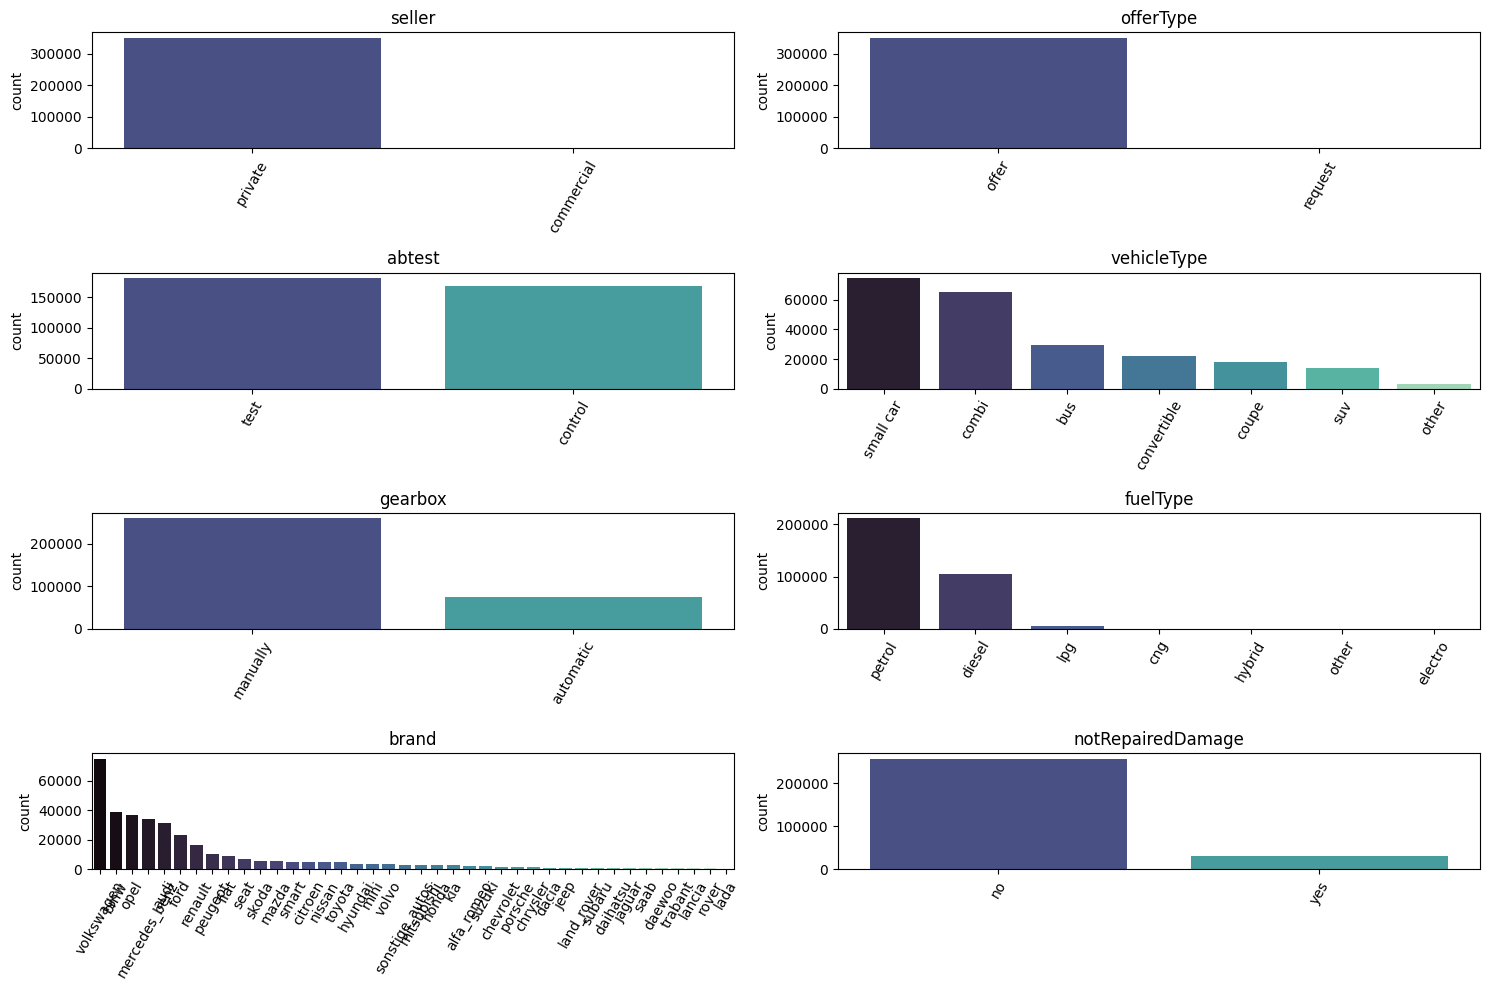

In [14]:
sp.plot_categoricas(df2)

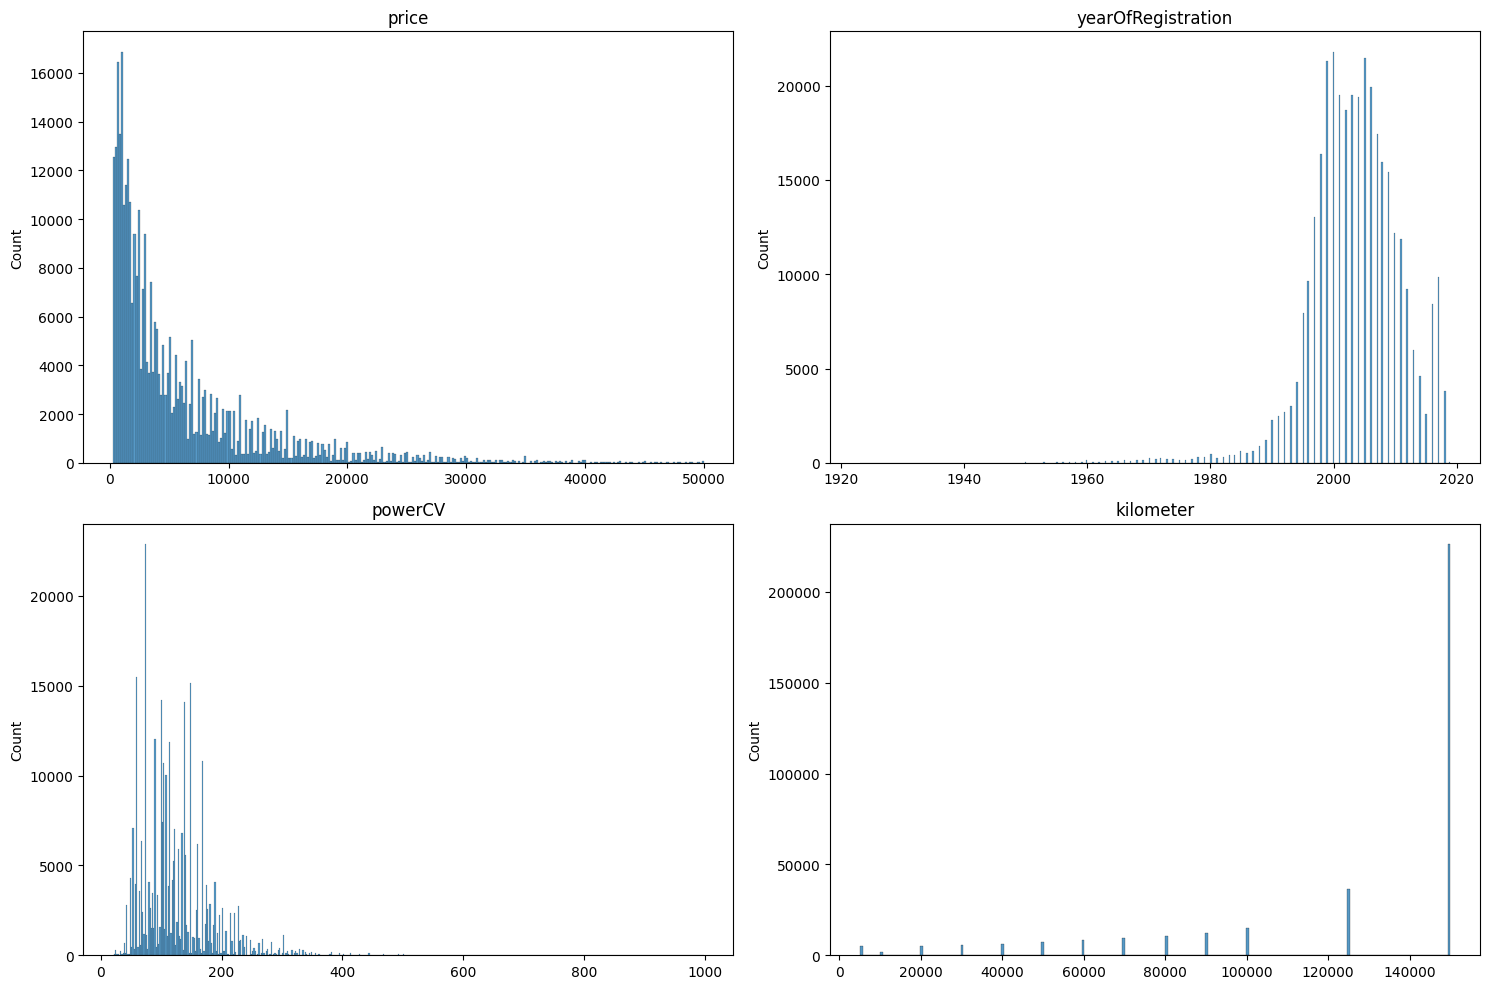

In [15]:
sp.plot_numericas(df2)

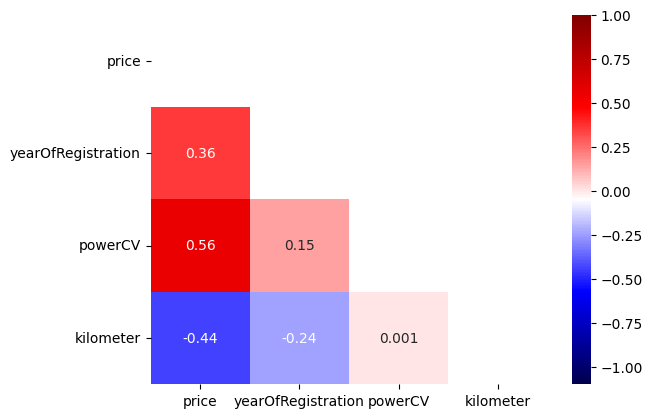

<Figure size 1000x1500 with 0 Axes>

In [16]:
sp.matriz_correlacion(df2)

Procedemos a la imputacion de valores por los diferentes metodos:
1. Los métodos categoricos
2. Los métodos numéricos

Método categórico

In [17]:
df.reset_index(drop=True,inplace=True)

In [18]:
# Vemos la cantidad actual que tenemos de nan
print(df.isnull().sum())

dateCrawled                 0
name                        0
seller                      0
offerType                   0
price                       0
abtest                      0
vehicleType            123498
yearOfRegistration        130
gearbox                 15461
powerCV                 33994
model                   16852
kilometer                   0
monthOfRegistration     29551
fuelType                26986
brand                       0
notRepairedDamage       62160
dateCreated                 0
nrOfPictures                0
postalCode                  0
lastSeen                    0
dtype: int64


#### SimpleImputer

In [19]:
# Selecciona las columnas categóricas
df_cat = df.select_dtypes(include="O")

# Imputa la categoría más frecuente en cada columna categórica
imputer = SimpleImputer(strategy="most_frequent")
df_cat_sin_nulos = pd.DataFrame(imputer.fit_transform(df_cat), columns=df_cat.columns)

# Copia el DataFrame original y reemplaza las columnas categóricas imputadas
df_simf = df.copy()
df_simf[df_cat.columns] = df_cat_sin_nulos

# Verifica que no haya valores nulos
print(df_simf.isnull().sum())

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType                0
yearOfRegistration       130
gearbox                    0
powerCV                33994
model                      0
kilometer                  0
monthOfRegistration    29551
fuelType                   0
brand                      0
notRepairedDamage          0
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64


In [20]:
# Probamos el SimpleImputer para imputar las categorias:
# Creamos una copia del DataFrame
df_nc = df.copy()

# Seleccionamos las columnas categóricas
categorical_columns = df_nc.select_dtypes(include="O").columns

# Imputamos la categoría 'other' en los valores nulos de 'fuelType' y 'vehicleType'
df_nc[["fuelType", "vehicleType"]] = df_nc[["fuelType", "vehicleType"]].fillna("other")

# Imputamos la categoría 'desconocido' en los valores nulos de todas las columnas categóricas
df_nc[categorical_columns] = df_nc[categorical_columns].apply(lambda x: x.fillna("desconocido"))

# Verificamos que no haya valores nulos
print(df_nc.isnull().sum())

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType                0
yearOfRegistration       130
gearbox                    0
powerCV                33994
model                      0
kilometer                  0
monthOfRegistration    29551
fuelType                   0
brand                      0
notRepairedDamage          0
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64


c:\Users\alexc\Desktop\GIT\7.1.EDA_y_Gestion_de_Nulos\src\support.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=columna, data=df_cat, ax=axes[indice],palette=paleta,order=df_cat[columna].value_counts().index)
c:\Users\alexc\Desktop\GIT\7.1.EDA_y_Gestion_de_Nulos\src\support.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=columna, data=df_cat, ax=axes[indice],palette=paleta,order=df_cat[columna].value_counts().index)
c:\Users\alexc\Desktop\GIT\7.1.EDA_y_Gestion_de_Nulos\src\support.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  

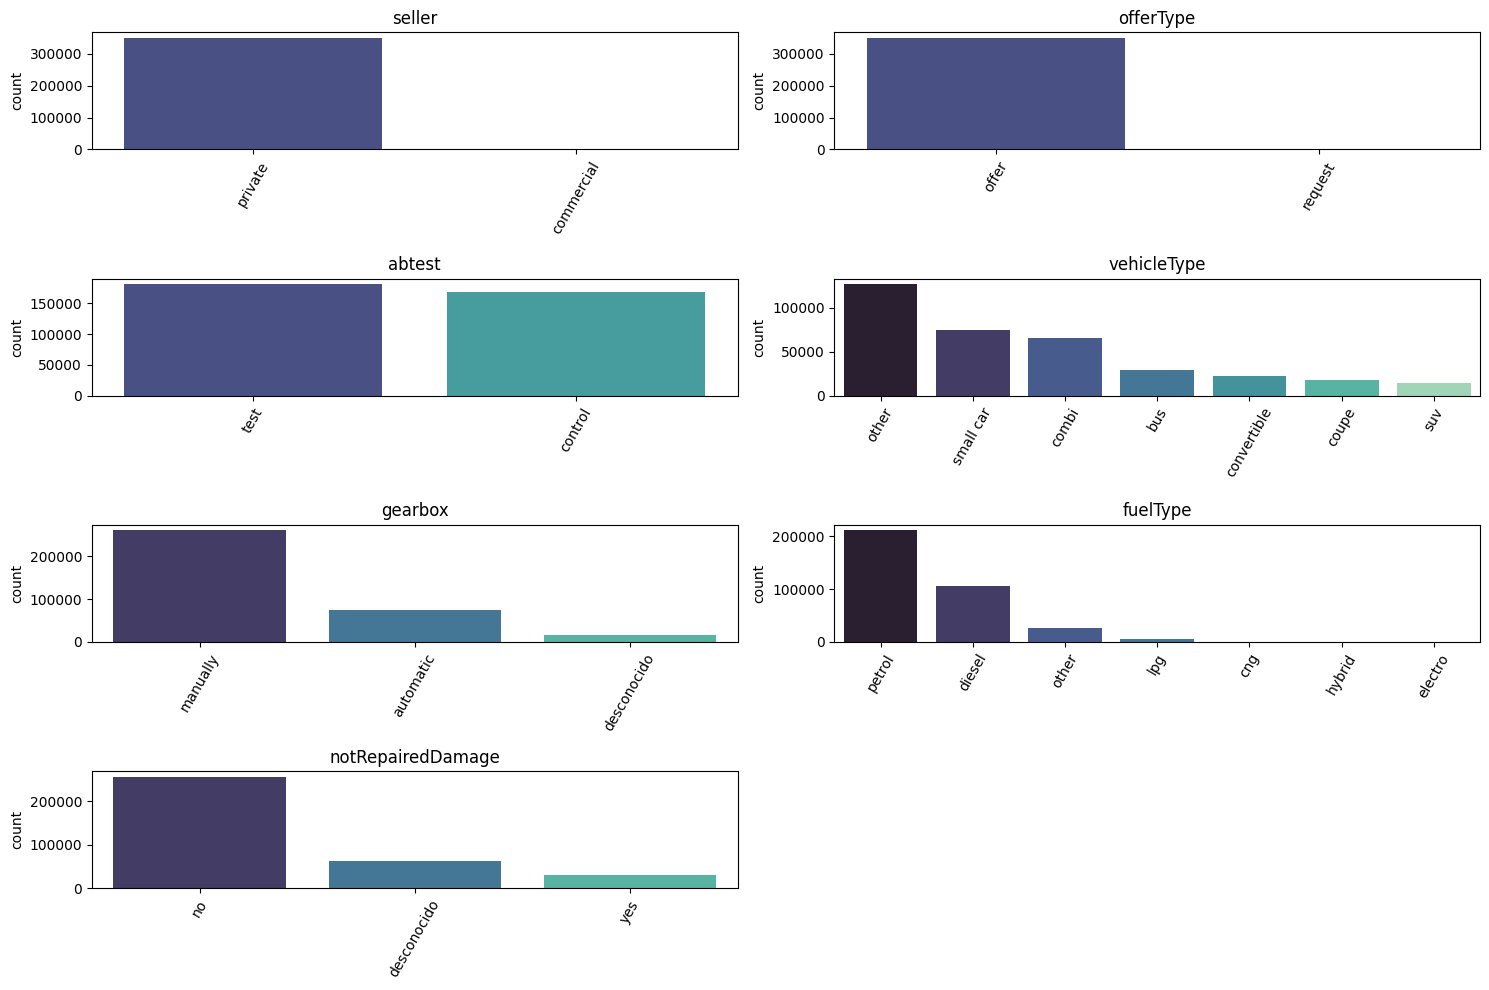

In [21]:
sp.plot_categoricas(df_nc.drop(columns=["postalCode","lastSeen","dateCreated","dateCrawled","name","nrOfPictures","monthOfRegistration","model","brand"]))

COJEMOS ESTE ÚLTIMO DF PARA CONTINUAR CON LAS IMPUTACIONES

### Método numérico

In [22]:
print(df_nc.isnull().sum())

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType                0
yearOfRegistration       130
gearbox                    0
powerCV                33994
model                      0
kilometer                  0
monthOfRegistration    29551
fuelType                   0
brand                      0
notRepairedDamage          0
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64


#### IterativeImputer

In [23]:
df_num = df.select_dtypes(include=np.number)
iter_imputer = IterativeImputer()
df_num_imputado = pd.DataFrame(iter_imputer.fit_transform(df_num), columns=df_num.columns)
df_iter = df_nc.copy()
df_iter[df_num.columns] = df_num_imputado
print(df_iter.isnull().sum())

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerCV                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
dtype: int64


#### RandomForestRegressor

In [24]:
# Copia completa del DataFrame original
df_rfr = df_nc.copy()

# Selecciona las columnas numéricas para la imputación
num_cols = df_rfr.select_dtypes(include=np.number).columns

for col in num_cols:
    # Filtra filas sin y con valores nulos en la columna actual
    df_train = df_rfr[df_rfr[col].notna()]
    df_missing = df_rfr[df_rfr[col].isna()]

    # Verifica si hay suficientes datos para entrenar
    if not df_missing.empty and len(df_train) > 10:
        # Configura el modelo de RandomForest con parámetros optimizados para mayor velocidad
        model = RandomForestRegressor(
            n_estimators=20,     
            max_depth=10,         
            min_samples_split=5, 
            random_state=0
        )
        
        # Selecciona las columnas predictoras
        predictors = df_train.select_dtypes(include=np.number).drop(columns=[col])

        # Entrena el modelo usando las columnas numéricas como predictores
        model.fit(predictors, df_train[col])

        # Predice los valores faltantes
        missing_predictors = df_missing.select_dtypes(include=np.number).drop(columns=[col])
        pred_values = model.predict(missing_predictors)
        
        # Rellena los valores faltantes en el DataFrame original
        df_rfr.loc[df_rfr[col].isna(), col] = pred_values


print(df_rfr.isnull().sum())

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerCV                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
dtype: int64


#### KNNImputer

In [25]:
df_num=df_nc.select_dtypes(include=np.number)
imputer_knn=KNNImputer(n_neighbors=2)
knn_imputado=imputer_knn.fit_transform(df_num)
df_num_sin_nulos=pd.DataFrame(knn_imputado, columns=df_num.columns)
df_knn=df_nc.copy()
df_knn[df_num.columns]=df_num_sin_nulos
df_knn.isnull().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerCV                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
dtype: int64

Comparamos las variables que se han imputado numericamente para observar cual se desvirtua menos de la realidad

In [26]:
df_list=[df,df_iter,df_rfr,df_knn]

In [27]:
sp.comparador_estaditicos(df_list)

,,count,mean,std,min,25%,50%,75%,max
DataFrame,,,,,,,,,
DF_1,monthOfRegistration,320412.0,6.392972,3.346875,1.0,4.0,6.000000,9.0,12.000000
DF_2,monthOfRegistration,349963.0,6.393007,3.202566,1.0,4.0,6.315667,9.0,12.000000
DF_3,monthOfRegistration,349963.0,6.386972,3.204586,1.0,4.0,6.023342,9.0,12.000000
DF_4,monthOfRegistration,349963.0,6.381216,3.283953,1.0,4.0,6.000000,9.0,12.000000
DF_1,powerCV,315969.0,124.445253,59.993346,20.0,79.0,114.000000,148.0,998.000000
DF_2,powerCV,349963.0,122.757075,58.093910,20.0,84.0,111.686798,148.0,998.000000
DF_3,powerCV,349963.0,122.580566,58.236708,20.0,81.0,111.000000,148.0,998.000000
DF_4,powerCV,349963.0,122.669249,58.882949,20.0,79.0,113.000000,148.0,998.000000
DF_1,yearOfRegistration,349833.0,2003.573745,7.430380,1923.0,1999.0,2004.000000,2008.0,2019.000000


Guardar los df en csv

In [28]:
# Guardamos los df en csv
df_iter.to_csv("result/df_iter.csv")
df_rfr.to_csv("result/df_rfr.csv")
df_knn.to_csv("result/df_knn.csv")